## Read Delta table with PySpark

In [3]:
# PySpark - show data
df = spark.read.load('Tables/iris_data',
    format='delta',
    header=True
)
display(df.limit(10))

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, 02bacb73-1991-4f11-843d-a745a32c6015)

In [4]:
df.show()

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 6, Finished, Available)

+---+------------+-----------+------------+-----------+---------+
|_c0|Sepal.Length|Sepal.Width|Petal.Length|Petal.Width|  Species|
+---+------------+-----------+------------+-----------+---------+
| 13|         4.8|          3|         1.4|        0.1|   setosa|
| 14|         4.3|          3|         1.1|        0.1|   setosa|
| 46|         4.8|          3|         1.4|        0.3|   setosa|
|103|         7.1|          3|         5.9|        2.1|virginica|
|105|         6.5|          3|         5.8|        2.2|virginica|
|106|         7.6|          3|         6.6|        2.1|virginica|
|113|         6.8|          3|         5.5|        2.1|virginica|
|117|         6.5|          3|         5.5|        1.8|virginica|
|128|         6.1|          3|         4.9|        1.8|virginica|
|130|         7.2|          3|         5.8|        1.6|virginica|
|136|         7.7|          3|         6.1|        2.3|virginica|
|139|           6|          3|         4.8|        1.8|virginica|
|146|     

You can also load the data using SQL!

In [41]:
df = spark.sql("SELECT * FROM Advent2023.iris_data LIMIT 3000")
display(df)

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 43, Finished, Available)

SynapseWidget(Synapse.DataFrame, b93e2a23-7dfd-4254-92e1-66ba72209926)

Let's do some visualisations

To use Species label for model training, we have to convert using StringIndexer and also we use VectorAssembler for collating at feature columns. 
These are the only two things that go in for model training.

In [42]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StringIndexer

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 44, Finished, Available)

And we need to change the data types!

In [ ]:
from pyspark.sql.types import IntegerType,BooleanType,DateType, DoubleType, IntegerType, DateType
from pyspark.sql.functions import col


#df.withColumn("Sepal.Length",col("Sepal.Length").cast(IntegerType()))

df2 = df.withColumn('Sepal.Length',col('Sepal.Length').cast("int")) \
    .withColumn('Sepal.Width',col('Sepal.Width').cast("int")) \
    .withColumn('Petal.Length',col('Petal.Length').cast("int")) \
    .withColumn('Petal.Width',col('Petal.Width').cast("int")) 
df2.printSchema()

In [99]:
df = spark.sql(
    """
    SELECT 
         CAST(`Sepal.Length` AS DECIMAL(5,1)) AS SepalLength
        ,CAST(`Sepal.Width` AS  DECIMAL(5,1))  AS SepalWidth
        ,CAST(`Petal.Length` AS  DECIMAL(5,1)) AS PetalLength
        ,CAST(`Petal.Width` AS  DECIMAL(5,1)) AS PetalWidth
       ,Species
    FROM
    Advent2023.iris_data LIMIT 3000
    """
    )

df.show()

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 101, Finished, Available)

+-----------+----------+-----------+----------+---------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|
+-----------+----------+-----------+----------+---------+
|        4.8|       3.0|        1.4|       0.1|   setosa|
|        4.3|       3.0|        1.1|       0.1|   setosa|
|        4.8|       3.0|        1.4|       0.3|   setosa|
|        7.1|       3.0|        5.9|       2.1|virginica|
|        6.5|       3.0|        5.8|       2.2|virginica|
|        7.6|       3.0|        6.6|       2.1|virginica|
|        6.8|       3.0|        5.5|       2.1|virginica|
|        6.5|       3.0|        5.5|       1.8|virginica|
|        6.1|       3.0|        4.9|       1.8|virginica|
|        7.2|       3.0|        5.8|       1.6|virginica|
|        7.7|       3.0|        6.1|       2.3|virginica|
|        6.0|       3.0|        4.8|       1.8|virginica|
|        6.7|       3.0|        5.2|       2.3|virginica|
|        6.5|       3.0|        5.2|       2.0|virginica|
|        5.9| 

In [100]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 102, Finished, Available)

Let's do some visualizations

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 104, Finished, Available)

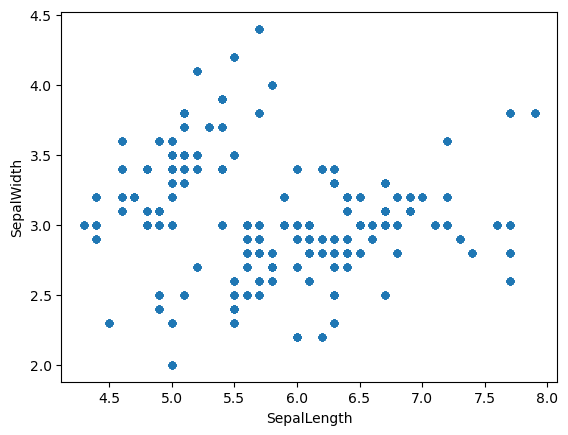

In [102]:
df2 = df.toPandas()
df2.plot(kind="scatter", x="SepalLength", y="SepalWidth")
plt.show()

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 106, Finished, Available)

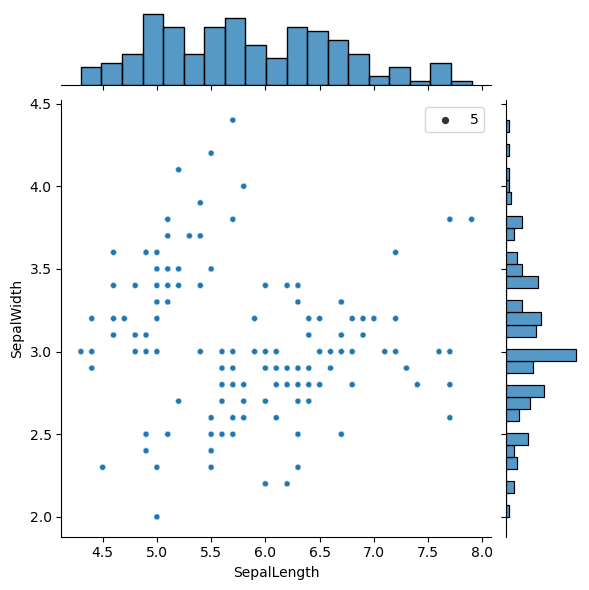

In [104]:
sns.jointplot(x="SepalLength", y="SepalWidth", data=df2, size=5)
plt.show()

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 110, Finished, Available)

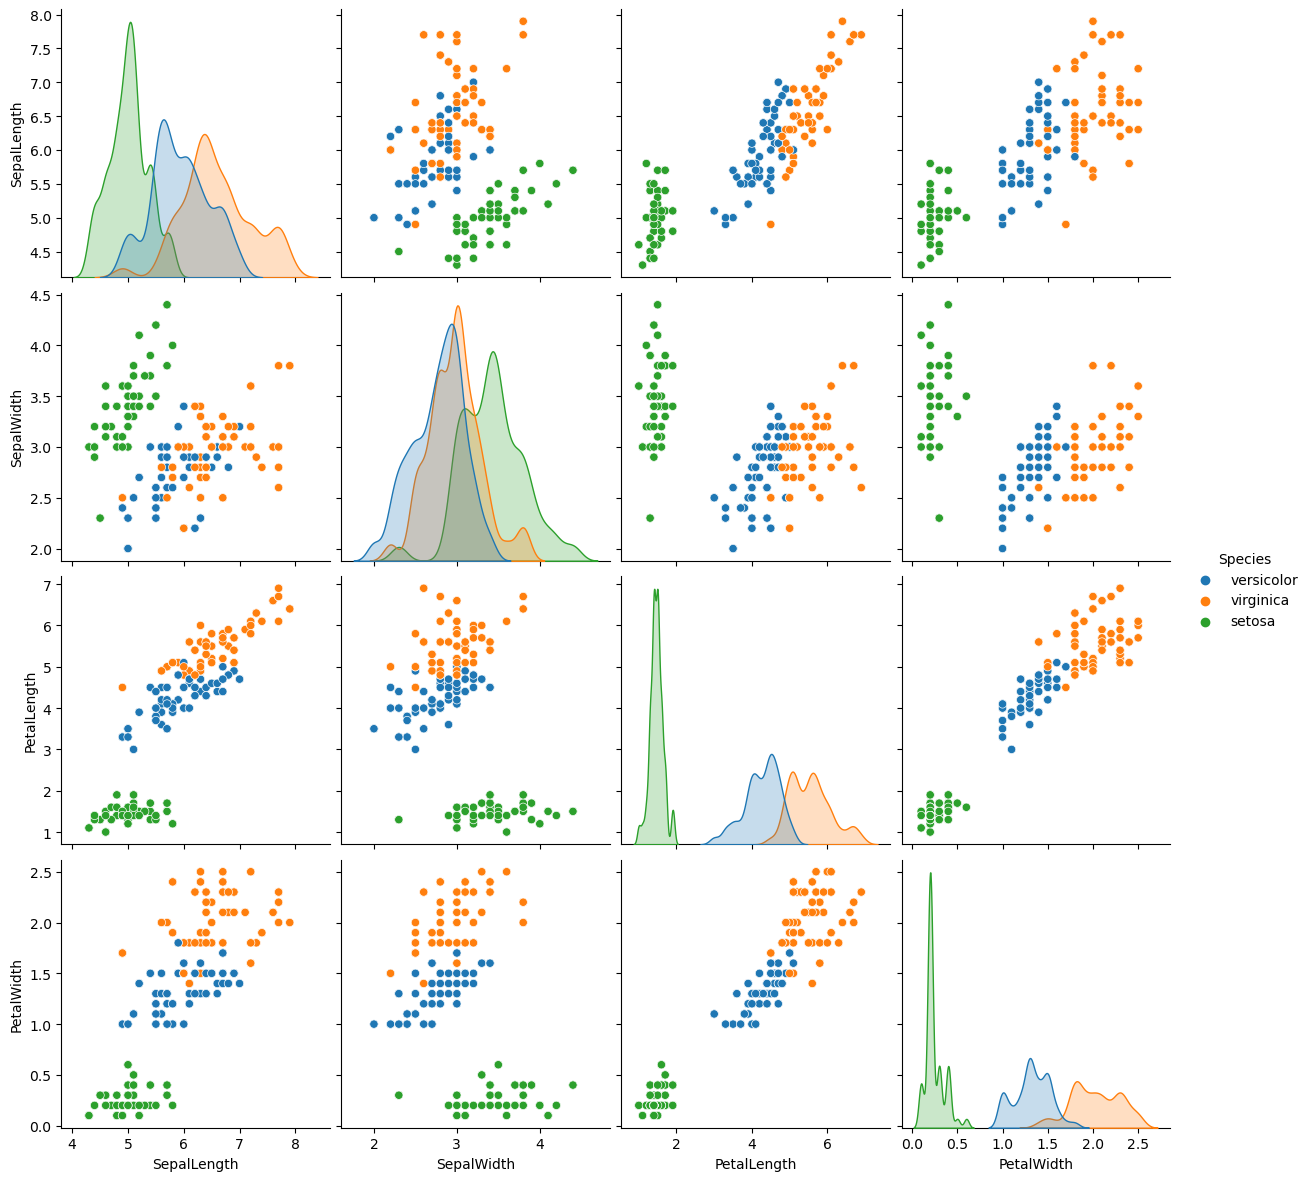

In [108]:
sns.pairplot(df2, hue="Species", size=3)
plt.show()

In [ ]:
#!pip install pandas.plotting
from pandas.plotting import radviz
from pandas.plotting import scatter_matrix
radviz(df2, "Species",colormap='autumn')
plt.show()

Let’s transform feature variables using VectorAssembler.

In [69]:
vectorAssembler = VectorAssembler(inputCols = ['SepalLength','SepalWidth','PetalLength','PetalWidth'], outputCol = 'features')
v_iris_df = vectorAssembler.transform(df)
v_iris_df.show(5)

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 71, Finished, Available)

+-----------+----------+-----------+----------+----------+-----------------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|   Species|         features|
+-----------+----------+-----------+----------+----------+-----------------+
|        6.0|       2.2|        4.0|       1.0|versicolor|[6.0,2.2,4.0,1.0]|
|        6.0|       2.7|        5.1|       1.6|versicolor|[6.0,2.7,5.1,1.6]|
|        6.0|       3.4|        4.5|       1.6|versicolor|[6.0,3.4,4.5,1.6]|
|        6.0|       2.2|        4.0|       1.0|versicolor|[6.0,2.2,4.0,1.0]|
|        6.0|       2.7|        5.1|       1.6|versicolor|[6.0,2.7,5.1,1.6]|
+-----------+----------+-----------+----------+----------+-----------------+
only showing top 5 rows



We can see this created an additional column called features, that has collated all feature column values into an array. Next, we will use StringIndexer to convert the Species label into a way that model can understand.

In [70]:
indexer = StringIndexer(inputCol = 'Species', outputCol = 'label')
i_v_iris_df = indexer.fit(v_iris_df).transform(v_iris_df)
i_v_iris_df.show(5)

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 72, Finished, Available)

+-----------+----------+-----------+----------+----------+-----------------+-----+
|SepalLength|SepalWidth|PetalLength|PetalWidth|   Species|         features|label|
+-----------+----------+-----------+----------+----------+-----------------+-----+
|        6.0|       2.2|        4.0|       1.0|versicolor|[6.0,2.2,4.0,1.0]|  1.0|
|        6.0|       2.7|        5.1|       1.6|versicolor|[6.0,2.7,5.1,1.6]|  1.0|
|        6.0|       3.4|        4.5|       1.6|versicolor|[6.0,3.4,4.5,1.6]|  1.0|
|        6.0|       2.2|        4.0|       1.0|versicolor|[6.0,2.2,4.0,1.0]|  1.0|
|        6.0|       2.7|        5.1|       1.6|versicolor|[6.0,2.7,5.1,1.6]|  1.0|
+-----------+----------+-----------+----------+----------+-----------------+-----+
only showing top 5 rows



In [71]:
i_v_iris_df.select('Species','label').groupBy('Species','label').count().show()

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 73, Finished, Available)

+----------+-----+-----+
|   Species|label|count|
+----------+-----+-----+
|versicolor|  1.0|  800|
| virginica|  2.0|  800|
|    setosa|  0.0|  800|
+----------+-----+-----+



Now, let's do the random split

In [73]:
splits = i_v_iris_df.randomSplit([0.6,0.4],1)
train_df = splits[0]
test_df = splits[1]
train_df.count(), test_df.count(), i_v_iris_df.count()

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 75, Finished, Available)

(1435, 965, 2400)

OK, now we can train the model and later also validated the model

In [74]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 76, Finished, Available)

Now, create the number of layers in the NN. We are using two hidden layers of 5 nodes each and hence our layers array is [4,5,5,3] (input-4, 2 x hidden-5, output nodes-3).

In [76]:
layers = [4,5,5,3]

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 78, Finished, Available)

In [77]:
mlp = MultilayerPerceptronClassifier(layers = layers, seed = 1)

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 79, Finished, Available)

And now fit the perceptron

In [78]:
mlp_model = mlp.fit(train_df)

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 80, Finished, Available)

2023-12-11:20:35:23,240 WARNING  [tracking_store.py:153] log_inputs not supported


Once model training is completed, use the transform method on the test data frame using the model object from the previous step. We store the results in a data frame called pred_df and review some of the columns and check the probabilities

In [84]:
pred_df = mlp_model.transform(test_df)
pred_df.select('features','label','rawPrediction','probability','prediction').show(10)


StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 86, Finished, Available)

+-----------------+-----+--------------------+--------------------+----------+
|         features|label|       rawPrediction|         probability|prediction|
+-----------------+-----+--------------------+--------------------+----------+
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.3,3.0,1.1,0.1]|  0.0|[31.1954644573665...|[0.99999965151658...|       0.0|
|[4.4,2.9,1.4,0.2]|  0.0|[31.1894379009488...|[0.99999964905130...|       0.0|
|[4.4,2.9,1.4,0.2]|  0.0|[31.1894379009488...|[0.99999964905130...|       0.0|
|[4.4,2.9,1.4,0.2]|  0.0|[31.1894379009488...|[0.999

And finally, evaluate the model

In [85]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'accuracy')
mlpacc = evaluator.evaluate(pred_df)
mlpacc

StatementMeta(, 00fe47ad-e3f3-40cd-ba2e-812924307e58, 87, Finished, Available)

2023-12-11:20:40:22,32 WARNING  [tracking_store.py:153] log_inputs not supported


0.983419689119171